In [ ]:
# Title - ONGC (Oil and Natutal Gas) stock price analysis using python programming
# About - This project analyzes the historical stock data of ONGC to identify trends,trading volume,price volatility and pattern over time
# Aim - To derive insights from the past data of ONGC using python-based data analysis techniques like time series plotting, rolling average and return distribution 

In [2]:
# Managing working directorys
%pwd
%cd "C:/Users/Hp/Desktop/29hrs of Data Analytics course"
%pwd

C:\Users\Hp\Desktop\29hrs of Data Analytics course


'C:\\Users\\Hp\\Desktop\\29hrs of Data Analytics course'

In [4]:
# Loading important library 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [6]:
# Importing dataset
Data = pd.read_csv("ONGC.NS_stock_data.csv")

In [8]:
#Basic Informations about data set
print(Data.shape)
print(Data.info())

(7124, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7124 non-null   object 
 1   open      7114 non-null   float64
 2   high      7114 non-null   float64
 3   low       7114 non-null   float64
 4   close     7114 non-null   float64
 5   adjclose  7114 non-null   float64
 6   volume    7114 non-null   float64
 7   ticker    7124 non-null   object 
dtypes: float64(6), object(2)
memory usage: 445.4+ KB
None


In [10]:
# Exploring dataset 
print(Data.describe())

              open         high          low        close     adjclose  \
count  7114.000000  7114.000000  7114.000000  7114.000000  7114.000000   
mean    121.707468   123.506457   119.701760   121.507015    75.545111   
std      72.080964    73.055927    70.990402    71.957474    53.755343   
min      10.622222    11.311111    10.566666    10.988888     3.416595   
25%      40.034722    40.777779    39.555553    40.022221    15.883293   
50%     138.666672   140.708336   136.575005   138.558334    84.665977   
75%     179.674999   181.979168   176.666672   179.212494   113.629057   
max     313.333344   314.566681   298.666656   310.433319   283.750000   

             volume  
count  7.114000e+03  
mean   8.465638e+06  
std    1.140461e+07  
min    0.000000e+00  
25%    1.548630e+06  
50%    5.892982e+06  
75%    1.084513e+07  
max    2.922325e+08  


In [12]:
# Exploring null values from the dataset
print(Data.isnull())
print(Data.isnull().sum())

       Date   open   high    low  close  adjclose  volume  ticker
0     False  False  False  False  False     False   False   False
1     False  False  False  False  False     False   False   False
2     False  False  False  False  False     False   False   False
3     False  False  False  False  False     False   False   False
4     False  False  False  False  False     False   False   False
...     ...    ...    ...    ...    ...       ...     ...     ...
7119  False  False  False  False  False     False   False   False
7120  False  False  False  False  False     False   False   False
7121  False  False  False  False  False     False   False   False
7122  False  False  False  False  False     False   False   False
7123  False  False  False  False  False     False   False   False

[7124 rows x 8 columns]
Date         0
open        10
high        10
low         10
close       10
adjclose    10
volume      10
ticker       0
dtype: int64


In [14]:
# Droping the columns which had too many missing values (only if more than 50% NaNs)
Data = Data.dropna(thresh = len(Data)*0.5, axis = 1)
print(Data)
print(Data.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [16]:
# Fill the null values by ffill(forward fill) and bfill(backward fill) method to maintain the data consistency
Data = Data.fillna(method="ffill").fillna(method="bfill")
print(Data)
print(Data.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

C:\Users\Hp\AppData\Local\Temp\ipykernel_14364\756126874.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data = Data.fillna(method="ffill").fillna(method="bfill")


In [18]:
# Removing the duplicate values from the dataset
Data = Data.drop_duplicates()
print(Data)
print(Data.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [20]:
# Converting date into datetime formate 
Data["Date"] = pd.to_datetime(Data["Date"])
print(Data)

           Date        open        high         low       close    adjclose  \
0    1996-01-01   18.888887   18.972221   18.777777   18.799999    5.640412   
1    1996-01-02   18.799999   19.277777   18.844444   19.088888    5.727086   
2    1996-01-03   19.333332   19.333332   18.888887   18.888887    5.667081   
3    1996-01-04   18.888887   18.900000   18.500000   18.894444    5.668749   
4    1996-01-05   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119 2024-04-23  276.850006  278.750000  275.549988  276.799988  276.799988   
7120 2024-04-24  277.600006  280.399994  276.299988  279.350006  279.350006   
7121 2024-04-25  279.350006  282.600006  278.000000  281.950012  281.950012   
7122 2024-04-26  283.000000  286.149994  282.200012  282.899994  282.899994   
7123 2024-04-29  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [22]:
# Now ensuring that the dataset is completely cleaned
print(Data.head(5))
print(Data.isnull().sum())
print(Data.info())

        Date       open       high        low      close  adjclose   volume  \
0 1996-01-01  18.888887  18.972221  18.777777  18.799999  5.640412  10800.0   
1 1996-01-02  18.799999  19.277777  18.844444  19.088888  5.727086  27000.0   
2 1996-01-03  19.333332  19.333332  18.888887  18.888887  5.667081  10800.0   
3 1996-01-04  18.888887  18.900000  18.500000  18.894444  5.668749  41400.0   
4 1996-01-05  18.894444  18.905556  18.666666  18.900000  5.670415  46800.0   

    ticker  
0  ONGC.NS  
1  ONGC.NS  
2  ONGC.NS  
3  ONGC.NS  
4  ONGC.NS  
Date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7124 non-null   datetime64[ns]
 1   open      7124 non-null   float64       
 2   high      7124 non-null   f

In [42]:
# Exploring the text columns from dataset (text column name, count)
for col in Data.select_dtypes(include="object").columns:
    print(f"\n{col} value count:\n",Data[col].value_counts())

['open', 'high', 'low', 'close', 'adjclose', 'volume']


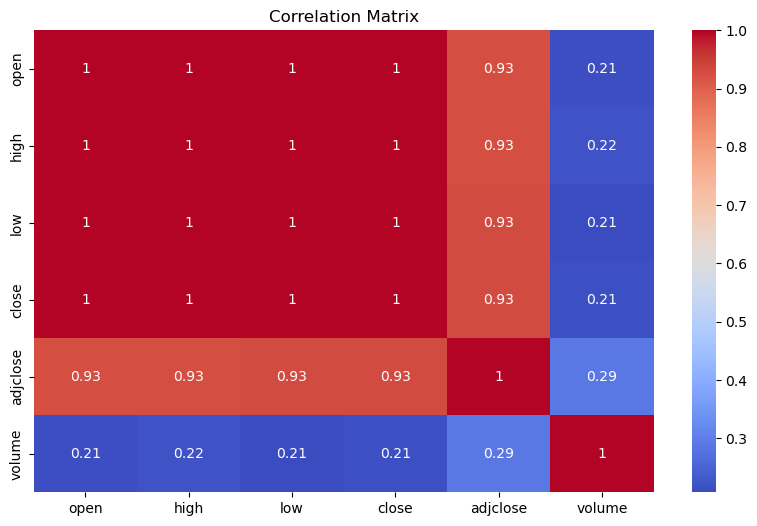

<Figure size 640x480 with 0 Axes>

In [50]:
# Droping the text column before plotting the correlation matrix because correlation method (corr()) not supports text values
#Data.drop("ticker",axis=1, inplace=True )

# Dropping date columns to avoide the misleadings
#Data.drop("Date", axis=1,inplace=True)

# Plotting of Correlation matrix on cleaned data for analysis
print(Data.columns.tolist())
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
plt.savefig("Corr_matrix.png")

In [ ]:
# Insights about the above Correlation plot
# Correlation means (+1 [Strong positive both go up together], 0 [No relation], -1[Strong negatice one goes up, other goes dow])
# [open vs close] -> Correlation 1.0 -> Strong positive 
# [adjclose vs close] -> Correlation 0.93 -> Very Strong positive 
# [volume vs open/high/low/close] -> Correlation ~0.22 -> Very weak correlation

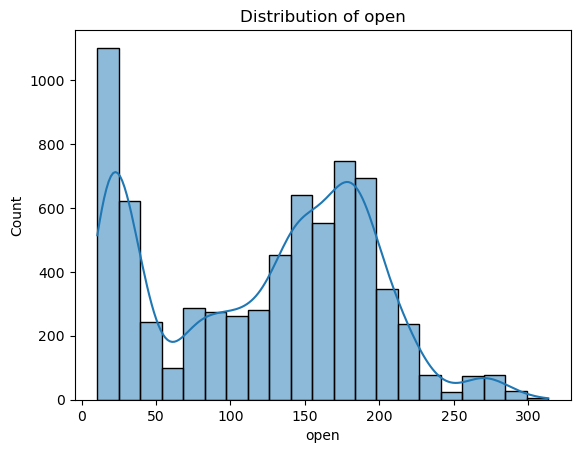

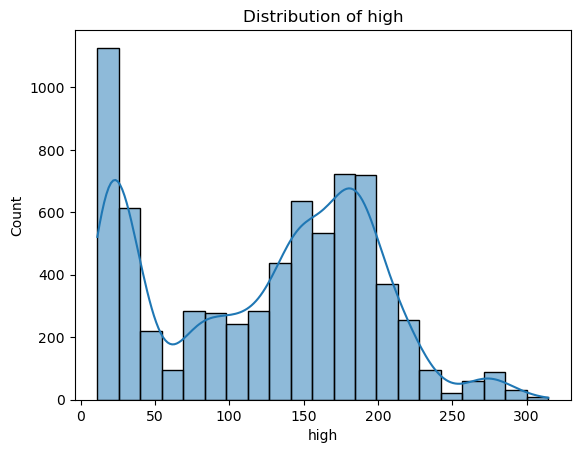

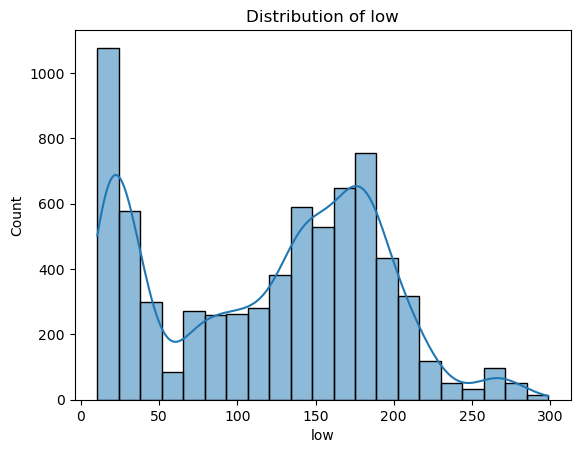

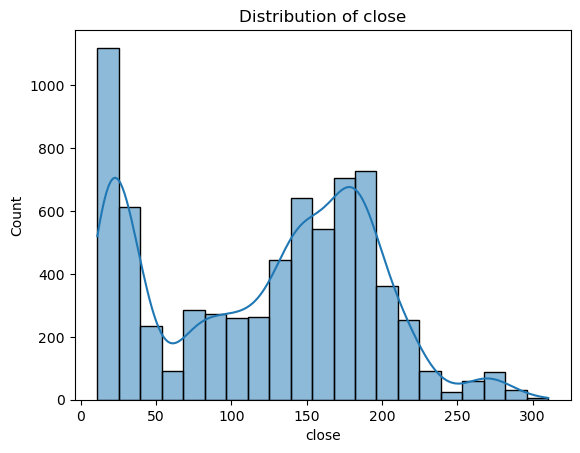

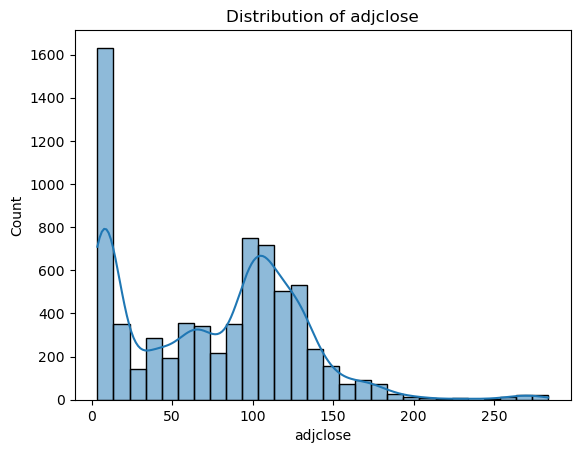

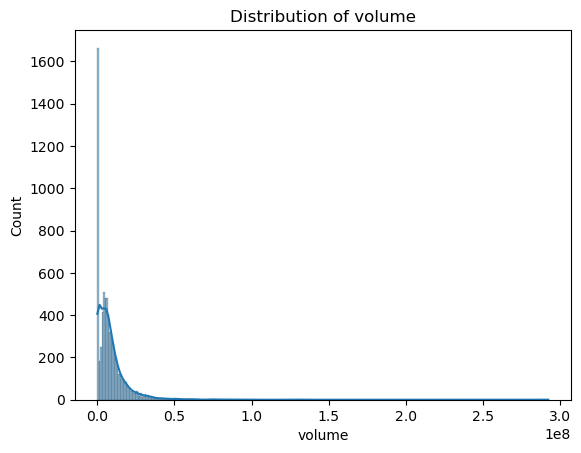

In [28]:
# Plotting of histogram on each column (open price, high price, low price, close price, adjust colser, volume)
# to track the continuity in stock price 
for col in Data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(Data[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Insight about the above Histogram + KDE plot

# Distribution of open :- There are 2 major peaks one at around low value (0-50) another at (150-200)
# lots of stocks opens at low price with another cluster present in mid range this is right skewed (more data on left)
# --------------------------------------------------------------------------------------------------------------------
# Distribution of high :- High price during the day similar shape to the (open distribution), again 2 peaks at 
# low and mid range, slightly right skewed indicates a few high value
# --------------------------------------------------------------------------------------------------------------------
# Distribution of low :- low price during the day similar shape as (open & high distribution), again 2 peaks at 
# low and mid range, some stocks drops very low even if they open high
# --------------------------------------------------------------------------------------------------------------------
# Distribution of close :- close price of stocks similar shape as (open,high & low distribution), again 2 peaks at 
# low and mid range, shows the opening stock price is same as closing price at almost same level
# --------------------------------------------------------------------------------------------------------------------
# Distribution of adjclose :- Adjusted for splits,dividends, mostly more concentrantion seen at near low level 
# fewer values at the high range
# --------------------------------------------------------------------------------------------------------------------
# Distribution of volume :- Total no. of shares traded, highly right skewed most of stocks have low trading volume 
# few hav very high voluem as we can see at right side

# The stock price of ONGC has been trading flat based above analysis 

In [30]:
# Saving the cleaned data 
Data.to_csv("Cleaned_dataset.csv",index = False)
print("Data cleaned and saved!")

Data cleaned and saved!
